In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

In [4]:
df=pd.read_csv(r'F:\Deep Learning Assignments\Assignment-4\Multiple CSV\8.twospirals.csv',header=None)

In [5]:
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]

<Axes: xlabel='0', ylabel='1'>

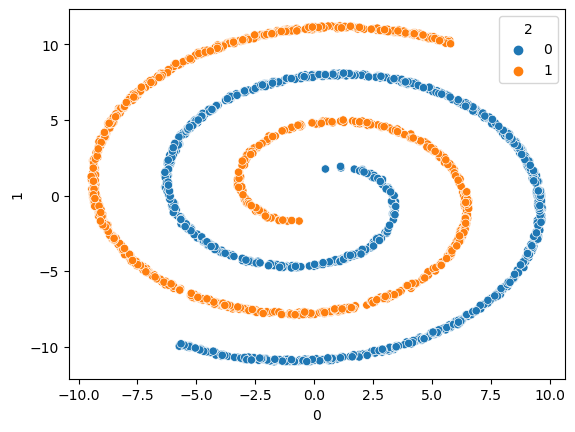

In [7]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [9]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [10]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.002),bias_regularizer=L2(0.002),input_dim=2))
model.add(Dense(5,activation="tanh",kernel_regularizer=L2(0.002),bias_regularizer=L2(0.002)))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.002),bias_regularizer=L2(0.002)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.002),bias_regularizer=L2(0.002)))

In [11]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
324/324 [==============================] - 5s 9ms/step - loss: 0.6478 - accuracy: 0.6802 - val_loss: 0.7171 - val_accuracy: 0.5944
Epoch 2/20
324/324 [==============================] - 2s 7ms/step - loss: 0.6449 - accuracy: 0.6728 - val_loss: 0.7092 - val_accuracy: 0.5944
Epoch 3/20
324/324 [==============================] - 2s 7ms/step - loss: 0.6426 - accuracy: 0.6802 - val_loss: 0.7112 - val_accuracy: 0.6000
Epoch 4/20
324/324 [==============================] - 2s 7ms/step - loss: 0.6409 - accuracy: 0.6840 - val_loss: 0.7156 - val_accuracy: 0.5944
Epoch 5/20
324/324 [==============================] - 2s 6ms/step - loss: 0.6382 - accuracy: 0.6802 - val_loss: 0.7058 - val_accuracy: 0.6056
Epoch 6/20
324/324 [==============================] - 3s 8ms/step - loss: 0.6377 - accuracy: 0.6852 - val_loss: 0.6955 - val_accuracy: 0.6056
Epoch 7/20
324/324 [==============================] - 3s 9ms/step - loss: 0.6365 - accuracy: 0.6914 - val_loss: 0.7018 - val_accuracy: 0.5778
Epoch 

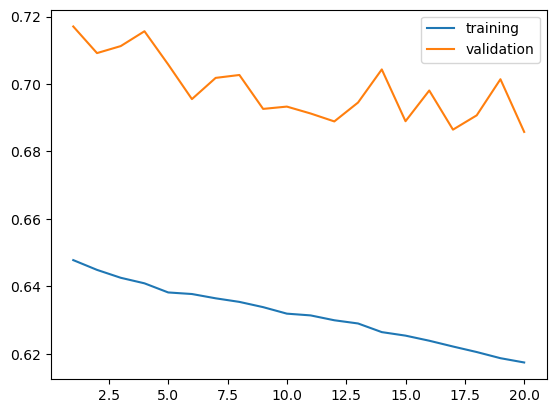

In [12]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 56s 6ms/step


<Axes: >

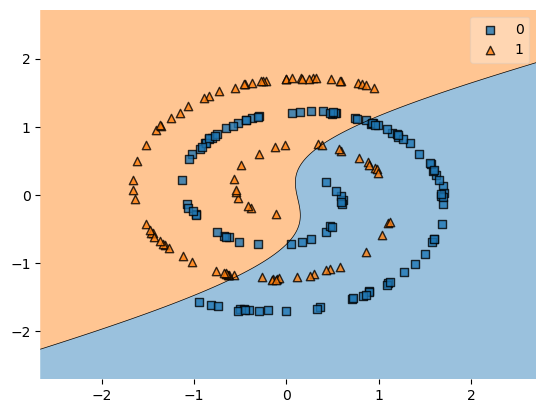

In [13]:
plot_decision_regions(x_testp,y_test.values,clf=model)